Overview

This is an exploratory data analaysis of a Brazilian E-Commerce company called Olist. The dataset was taken from [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data). The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

Database Schema

![](https://i.imgur.com/HRhd2Y0.png)

Tables Descriptions

1. orders

Stores information about customer orders.

    order_id: Unique identifier for each order.
    customer_id: ID of the customer who placed the order.
    order_status: Current status of the order (e.g., delivered, shipped, canceled).
    order_purchase_timestamp: Timestamp when the order was placed.
    order_approved_at: Timestamp when the payment was approved.
    order_delivered_carrier_date: Date when the order was handed over to the carrier.
    order_delivered_customer_date: Date when the customer received the order.
    order_estimated_delivery_date: Estimated delivery date of the order.
-----------
2. order_items

Details of products in each order.

    order_id: Identifier of the order.
    order_item_id: Sequential number of the item in the order.
    product_id: Identifier of the product in the order.
    seller_id: Identifier of the seller who provided the product.
    shipping_limit_date: Deadline for the seller to ship the product.
    price: Price of the product.
    freight_value: Cost of shipping the product.
---------------
3. order_reviews

Customer reviews for orders.

    review_id: Unique identifier for each review.
    order_id: Identifier of the order being reviewed.
    review_score: Rating given by the customer (e.g., 1-5 stars).
    review_comment_title: Title of the review (if provided).
    review_comment_message: Text message left by the customer as feedback.
    review_creation_date: Date the review was submitted.
    review_answer_timestamp: Timestamp when the review was responded to.
-----------------
4. order_payments

Payment details for each order.

    order_id: Identifier of the order.
    payment_sequential: Sequence number for payments related to the order.
    payment_type: Payment method used (e.g., credit card, boleto).
    payment_installments: Number of installments chosen for the payment.
    payment_value: Total payment amount.
--------------------
5. customers

Details of customers who place orders.

    customer_id: Unique identifier for each customer.
    customer_unique_id: Unique identifier for a customer across multiple orders.
    customer_zip_code_prefix: Postal code prefix of the customer.
    customer_city: City where the customer is located.
    customer_state: State where the customer is located.
-------------------
6. sellers

Details of sellers offering products.

    seller_id: Unique identifier for each seller.
    seller_zip_code_prefix: Postal code prefix of the seller.
    seller_city: City where the seller is located.
    seller_state: State where the seller is located.
----------------
7. products

Information about products available for sale.

    product_id: Unique identifier for each product.
    product_category_name: Category name of the product.
    product_name_length: Length of the product name (in characters).
    product_description_length: Length of the product description (in characters).
    product_photos_qty: Number of photos available for the product.
    product_weight_g: Weight of the product in grams.
    product_length_cm: Length of the product in centimeters.
    product_height_cm: Height of the product in centimeters.
    product_width_cm: Width of the product in centimeters.
    price: Price of the product.
------------------
8. product_category_name_translation

Mapping of product category names to English.

    product_category_name: Original category name.
    product_category_name_english: Translated category name in English.
-------------------
9. geolocation

Geographical data of customers and sellers.

    geolocation_zip_code_prefix: Postal code prefix of the location.
    geolocation_lat: Latitude coordinate.
    geolocation_lng: Longitude coordinate.
    geolocation_city: City name.
    geolocation_state: State name.
----------------------

Questions to Answer

1) What is the proportion of orders that are not delivered?
2) What are the trends in orders over time?
3) What are the best times for customer purchases?
4) What is the proportion of orders delivered on time?
5) Which payment type do customers use the most?
6) Which product category has the highest order rate?
7) Which product category achieves the highest revenue?
8) What is the overall performance by review?
9) Which states have the largest customer bases?

Importing important libraries and Gathering Data

In [108]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Function to insert all datasets into one dictionary which has datasets and its columns as list.

import os
import glob

# Define the path where the CSV files are stored
data_path = r"C:\Users\ACER\Downloads\SQL and Python Project\archive\*.csv"

# Initialize dictionaries and lists
datasets = {}
file_names = []

# Loop through each CSV file in the directory
for file in glob.glob(data_path):
    file_name = os.path.basename(file).split('.')[0].replace('olist_', '').replace('_dataset', '')
    file_names.append(file_name)
    datasets[file_name] = pd.read_csv(file)

# Display loaded dataset names
print("Datasets loaded:", file_names)


Datasets loaded: ['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers', 'product_category_name_translation']


Assessing Data

In [111]:
# To display basic dataset structure and data of these many datasets we will use a way where we will create a temporary dataset to store all of values
datasets_info = pd.DataFrame()

# Now we will load the data
datasets_info['Dataset'] = file_names
datasets_info['n_rows'] = [datasets[file].shape[0] for file in file_names]
datasets_info['n_cols'] = [datasets[file].shape[1] for file in file_names]
datasets_info['null_vals'] = [datasets[file].isnull().sum().sum() for file in file_names]
datasets_info['duplicates'] = [datasets[file].duplicated().sum() for file in file_names]
datasets_info['null_cols'] = [', '.join([col for col, null in datasets[file].isnull().sum().items() if null > 0]) for file in file_names]

In [112]:
datasets_info.style

,Dataset,n_rows,n_cols,null_vals,duplicates,null_cols
0,customers,99441,5,0,0,
1,geolocation,1000163,5,0,261831,
2,orders,99441,8,4908,0,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,order_items,112650,7,0,0,
4,order_payments,103886,5,0,0,
5,order_reviews,99224,7,145903,0,"review_comment_title, review_comment_message"
6,products,32951,9,2448,0,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,3095,4,0,0,
8,product_category_name_translation,71,2,0,0,


In [113]:
# We will now explore deeper in the null values for every dataset
dataset_overview = pd.DataFrame(columns=['Dataset_Name', 'Column_Name', 'Null_Counts', 'Null_Values%', 'Datatype'])

# data
for file in file_names:
    nulls = datasets[file].isnull().sum()
    nulls.name = 'Null_Counts'
    df_nulls = nulls.reset_index().rename(columns={'index':'Column_Name'})
    df_nulls['Null_Values%'] = np.round(df_nulls.Null_Counts.values/datasets[file].shape[0], decimals=2)*100
    df_nulls['Null_Values%'] = df_nulls['Null_Values%'].fillna(0)
    # Datatypes
    datatypes = datasets[file].dtypes
    datatypes.name = 'Datatype'
    df_datatypes = datatypes.reset_index().rename(columns={'index':'Column_Name'})

    # combine all of this to one dataset
    df = df_nulls.merge(df_datatypes, on='Column_Name', how='inner')
    df['Dataset_Name'] = file
    dataset_overview = pd.concat((dataset_overview, df)).reset_index(drop=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6624\2842329490.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataset_overview = pd.concat((dataset_overview, df)).reset_index(drop=True)


In [114]:
dataset_overview.style.background_gradient()

,Dataset_Name,Column_Name,Null_Counts,Null_Values%,Datatype
0,customers,customer_id,0,0.000000,object
1,customers,customer_unique_id,0,0.000000,object
2,customers,customer_zip_code_prefix,0,0.000000,int64
3,customers,customer_city,0,0.000000,object
4,customers,customer_state,0,0.000000,object
5,geolocation,geolocation_zip_code_prefix,0,0.000000,int64
6,geolocation,geolocation_lat,0,0.000000,float64
7,geolocation,geolocation_lng,0,0.000000,float64
8,geolocation,geolocation_city,0,0.000000,object
9,geolocation,geolocation_state,0,0.000000,object


After deeper analysis, we can see that the null values tell three things
- the null values in order_reviews are normal as many people just give a start rating
- the null values in order from columns order delivered dates for carrier and customer tell that some customers have not received their order so it can be that the orders were cancelled, delayed, or anything else.
- the null values in products are just about missing description which we can deal by removing them

Cleaning Data

In [117]:
# we will remove null now from just products

datasets['products'] = datasets['products'][~datasets['products']['product_category_name'].isnull()]
# this ~ sign inverses the output. So this reads as that we do not want the row values which have null which will give us non-null values
print(datasets['products'].isnull().sum())

# In the output it shows that the dimensions still have a null value but we do not use dimensions in this EDA.

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64


In [118]:
# We will now convert the timestamp into datetime format for clarity
date_time_cols = {'orders':['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date', 
                                'order_delivered_customer_date','order_estimated_delivery_date'],
                      'order_items':['shipping_limit_date']
                     }
for dataset, col in date_time_cols.items():
    datasets[dataset][col] = datasets[dataset][col].apply(pd.to_datetime, errors='coerce')

In [119]:
for dataset, cols in date_time_cols.items():
    for col in cols:
        print(datasets[dataset][col].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [120]:
# We can now get day, week, month, year from the data
datasets['orders']['day_of_week'] = datasets['orders']['order_purchase_timestamp'].dt.weekday
datasets['orders']['hour'] = datasets['orders']['order_purchase_timestamp'].dt.hour
datasets['orders']['month'] = datasets['orders']['order_purchase_timestamp'].dt.month
datasets['orders']['year'] = datasets['orders']['order_purchase_timestamp'].dt.year
datasets['orders']['date'] = datasets['orders']['order_purchase_timestamp'].dt.to_period('M') #to get first day of month

# We will create a new column for days to delivery
datasets['orders']['days_to_delivery'] = datasets['orders']['order_delivered_customer_date']-datasets['orders']['order_purchase_timestamp']

Exploratory Data Analysis

What is the proportion of orders that are not delivered?

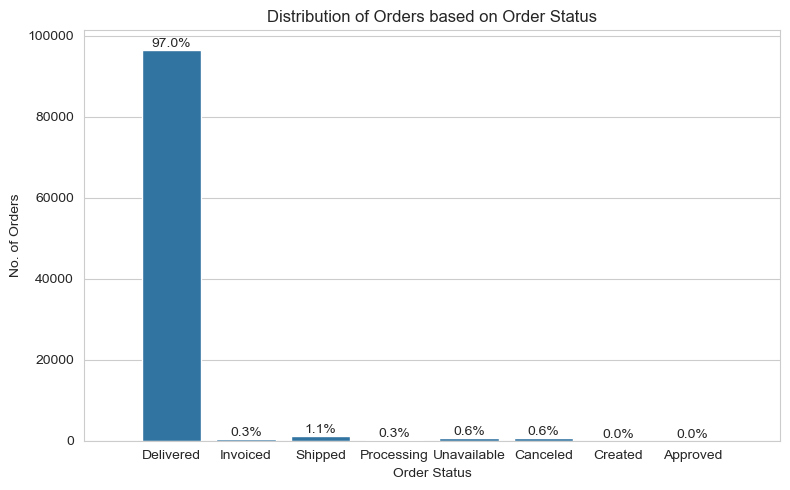

In [123]:
# order status distribution
datasets['orders']['order_status'] = datasets['orders']['order_status'].str.title()
order_status_count = datasets['orders']['order_status'].value_counts()
#plot
plt.figure(figsize=(8, 5))  
ax = sns.countplot(x=datasets['orders']['order_status'])

for a in ax.containers:
    ax.bar_label(a, fmt=lambda x: f'{(x/order_status_count.sum())*100:0.1f}%')

ax.margins(x=0.1)

ax.set_xlabel("Order Status")
ax.set_ylabel("No. of Orders")
ax.set_title("Distribution of Orders based on Order Status")

plt.tight_layout()
plt.show()

**Delivered has the highest occurances in order status with 97% orders. Others take up a total of 3%**

What are the monthly trends in orders and sales over time?

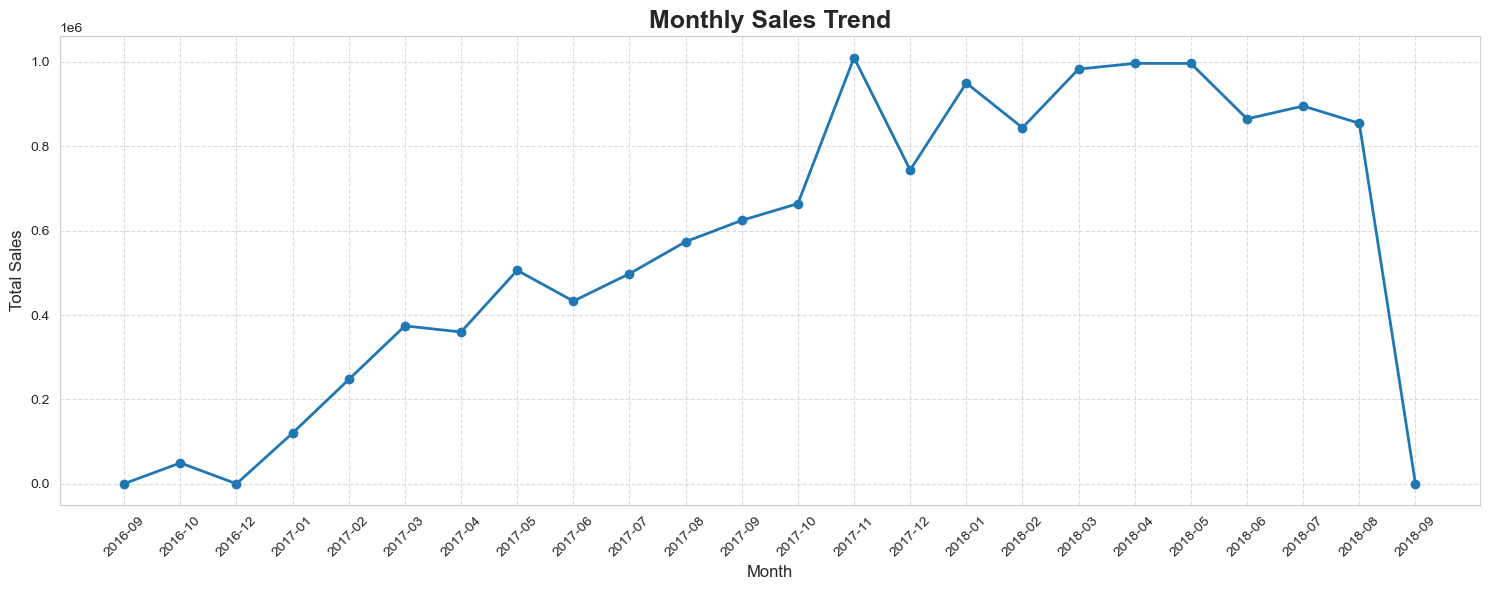

In [126]:
# Monthly sales trend
# First we create a merged dataframe as the values we need are in two different tables
merged_df = datasets['orders'].merge(datasets['order_items'], on='order_id', how='inner')

# Extract year and month for grouping
merged_df['year_month'] = merged_df['date'].dt.strftime('%Y-%m')

# Group by year-month and sum the prices
monthly_sales = merged_df.groupby('year_month')['price'].sum().reset_index()

# Create a proper datetime column for plotting (first day of each month)
monthly_sales['date_parsed'] = pd.to_datetime(monthly_sales['year_month'] + '-01')
monthly_sales = monthly_sales.sort_values('date_parsed')

# Plot with the formatted dates
plt.figure(figsize=(15, 6))
plt.plot(range(len(monthly_sales)), monthly_sales['price'], marker='o', 
         linestyle='-', linewidth=2, color='#1f77b4')

# Set x-tick positions and labels
plt.xticks(range(len(monthly_sales)), monthly_sales['year_month'], rotation=45)

# Formatting
plt.title('Monthly Sales Trend', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis with scientific notation similar to the image
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))

plt.tight_layout()
plt.show()

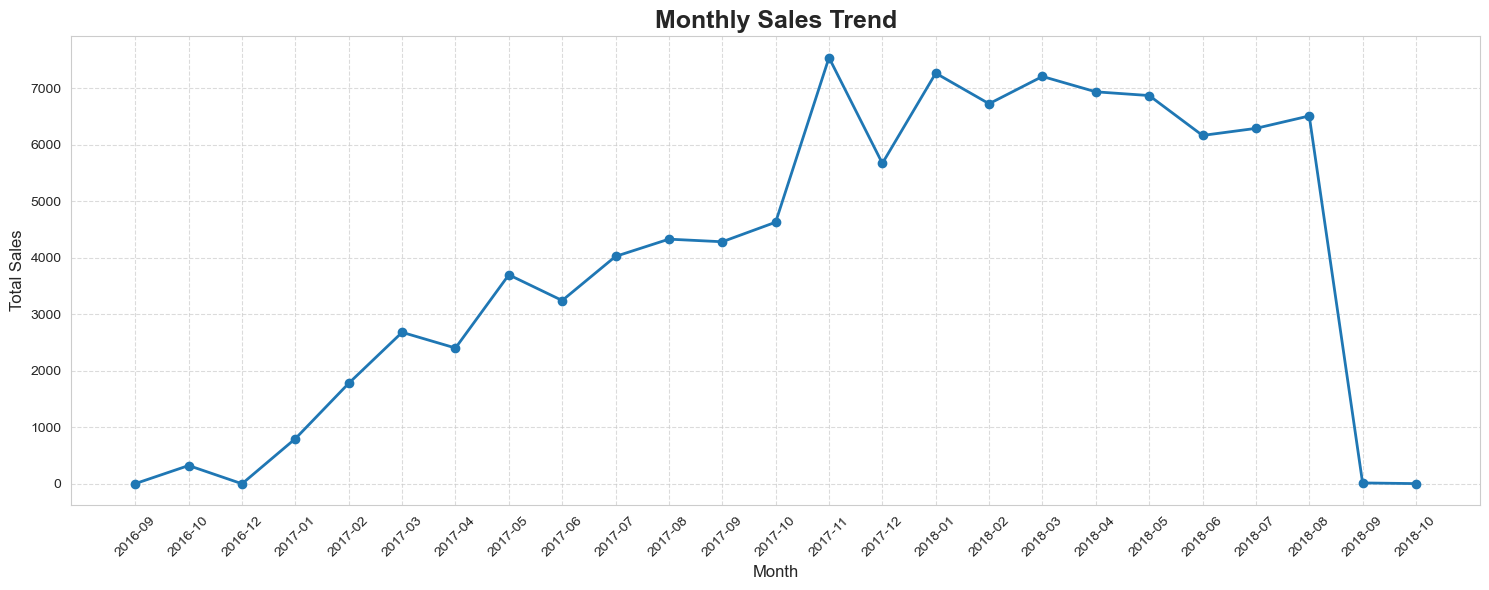

In [127]:
# Monthly order quantity trend
# First we create a merged dataframe as the values we need are in two different tables
merged_df = datasets['orders']

# Extract year and month for grouping
merged_df['year_month'] = merged_df['date'].dt.strftime('%Y-%m')

# Group by year-month and sum the prices
monthly_qty = merged_df.groupby('year_month')['order_id'].count().reset_index()

# Create a proper datetime column for plotting (first day of each month)
monthly_qty['date_parsed'] = pd.to_datetime(monthly_qty['year_month'] + '-01')
monthly_qty = monthly_qty.sort_values('date_parsed')

# Plot with the formatted dates
plt.figure(figsize=(15, 6))
plt.plot(range(len(monthly_qty)), monthly_qty['order_id'], marker='o', 
         linestyle='-', linewidth=2, color='#1f77b4')

# Set x-tick positions and labels
plt.xticks(range(len(monthly_qty)), monthly_qty['year_month'], rotation=45)

# Formatting
plt.title('Monthly Sales Trend', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis with scientific notation similar to the image
# plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))

plt.tight_layout()
plt.show()

IMPORTANT!! WE NEED TO ANNOTATE THE HIGHEST VALUE IN BOTH

What are the best times for customer purchases?

We will check the best time for customer purchase based on the 24 hour cycle, week, and month.

In [131]:
# We declared weekday, month and hour before only. Now we will refine them.

datasets['orders']['day_of_week'] = datasets['orders']['order_purchase_timestamp'].dt.day_name()
datasets['orders']['month_name'] = datasets['orders']['order_purchase_timestamp'].dt.month_name()

# To divide the day from dawn to night we will create custom label
time_period=['Dawn','Morning','Afternoon','Evening','Night']
time_range=[0,5,12,17,20,24]

datasets['orders']['day_time'] = pd.cut(datasets['orders']['hour'], bins=time_range, labels=time_period)

# We will create custom labels for weekday and months
week_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

time_period_count = datasets['orders']['day_time'].value_counts()
week_day_count = datasets['orders']['day_of_week'].value_counts()
month_name_count = datasets['orders']['month_name'].value_counts()

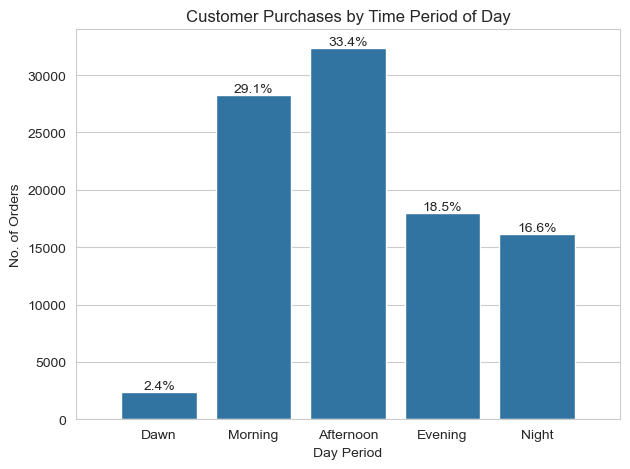

In [132]:
# Plot for customer purchases by time period of day
ax = sns.countplot(data=datasets['orders'], x='day_time', order=time_period)

for a in ax.containers:
    ax.bar_label(a, fmt=lambda x: f'{(x/time_period_count.sum())*100:0.1f}%')

ax.margins(x=0.1)

ax.set_xlabel("Day Period")
ax.set_ylabel("No. of Orders")
ax.set_title("Customer Purchases by Time Period of Day")

plt.tight_layout()
plt.show()

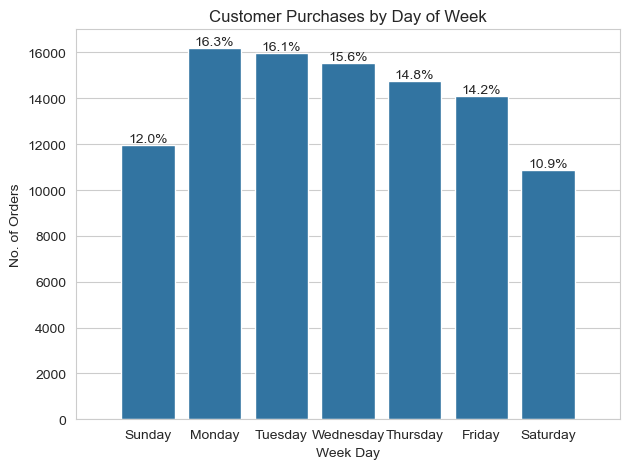

In [133]:
# Plot for customer purchases by weekday

ax = sns.countplot(data=datasets['orders'], x='day_of_week', order=week_day)

for a in ax.containers:
    ax.bar_label(a, fmt=lambda x: f'{(x/week_day_count.sum())*100:0.1f}%')

ax.margins(x=0.1)

ax.set_xlabel("Week Day")
ax.set_ylabel("No. of Orders")
ax.set_title("Customer Purchases by Day of Week")

plt.tight_layout()
plt.show()

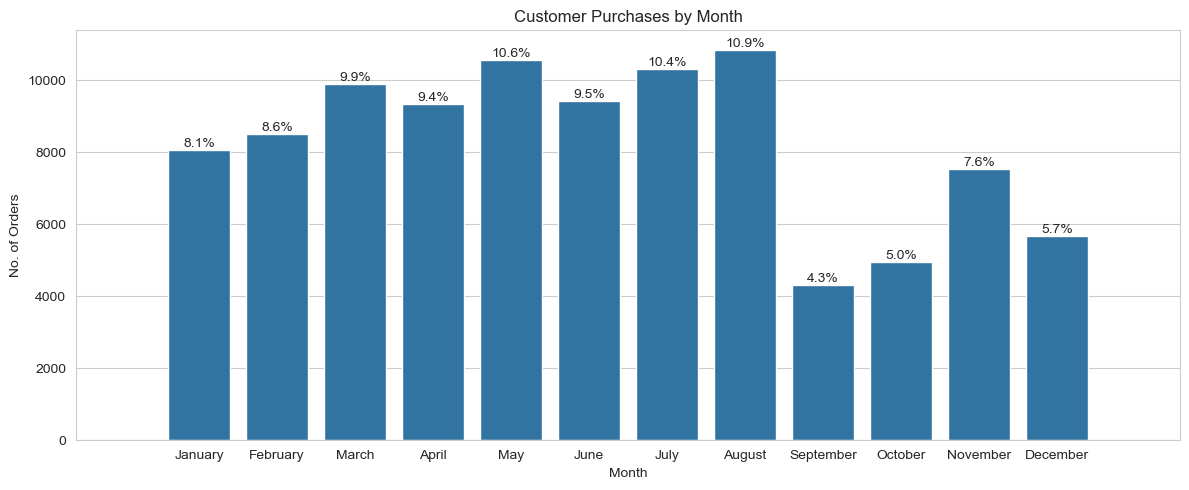

In [134]:
# Plot for customer purchases by month
plt.figure(figsize=(12,5))

ax = sns.countplot(data=datasets['orders'], x='month_name', order=months)

for a in ax.containers:
    ax.bar_label(a, fmt=lambda x: f'{(x/month_name_count.sum())*100:0.1f}%')

ax.margins(x=0.1)

ax.set_xlabel("Month")
ax.set_ylabel("No. of Orders")
ax.set_title("Customer Purchases by Month")

plt.tight_layout()
plt.show()

**We can see that**  
**- During the time of Afternoon the most orders are placed with 33.4%**  
**- Sunday and Saturday are the least busy times with the Monday being the highets with 16.3% and then a gradual decline till Friday at 14.2%**  
**- There is a steady growth till the month of August and then there is a huge dip at September at 4.3% which slowly picks up**  

What is the proportion of orders delivered on time?

In [137]:
# orders delivered on time
on_time_count = (datasets['orders']['order_delivered_customer_date'] <= datasets['orders']['order_estimated_delivery_date'])
on_time_count = on_time_count.value_counts()
label = ['On Time' if val else 'Late' for val in on_time_count.index]

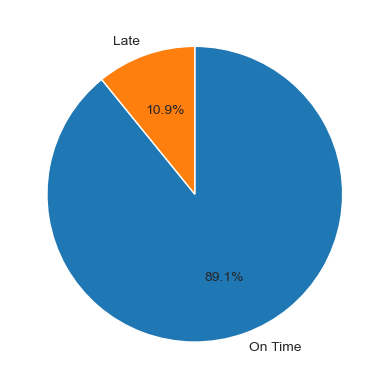

In [138]:
_, _, autotexts = plt.pie(x=on_time_count, labels=label, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.show()

**89.1% of orders have been delivered on or before the estimated delivery date**

Which payment type do customers use the most?

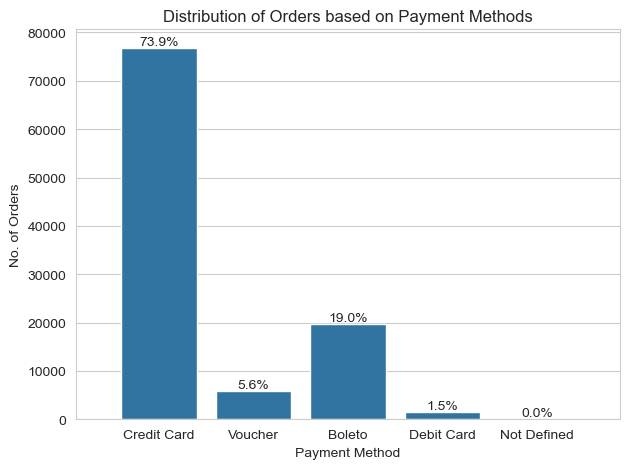

In [141]:
# Payment Type Distribution
payment_type = datasets['orders'].merge(datasets['order_payments'], on=['order_id'], how='left')

# we see that payment types has _ and others things we will clean it
payment_type['payment_type'] = payment_type['payment_type'].str.replace('_', " ").str.title().str.strip().fillna('Not Defined')

payment_counts = payment_type['payment_type'].value_counts()

# plot
ax = sns.countplot(payment_type, x='payment_type')

# To include percentage in the chart
for a in ax.containers:
    ax.bar_label(a, fmt=lambda x: f'{(x/payment_counts.sum())*100:0.1f}%')

ax.margins(x=0.1)

ax.set_xlabel("Payment Method")
ax.set_ylabel("No. of Orders")
ax.set_title("Distribution of Orders based on Payment Methods")

plt.tight_layout()
plt.show()

**73.9% of orders have been paid using a credit card and in 2nd comes Boleto with 19.0%**

Which product category has the highest order rate?

In [144]:
# product categories
# we will first get the english names of product categories
products = datasets['products'].merge(datasets['product_category_name_translation'], on='product_category_name', how='inner')
# merged_df.head()

# we see that the english category has names which have _, and mayeb trailing spaces which we can remove for better readability
products['product_category_name_english'] = products['product_category_name_english'].str.replace('_', " ").str.title().str.strip().fillna('Unknown')

# we will now join order_id to count the number of time a particular product category has been ordered
products = products.merge(datasets['order_items'], on='product_id', how='left') # we have used left here because there can be some product ids which have not been ordered. by using left we will fill null in those columns whose product_id was not in ordered items which gives us the whole picture about what all was ordered
products.head(10)

# we will now count the number of orders placed in each product category
count_product_category = products['product_category_name_english'].value_counts()

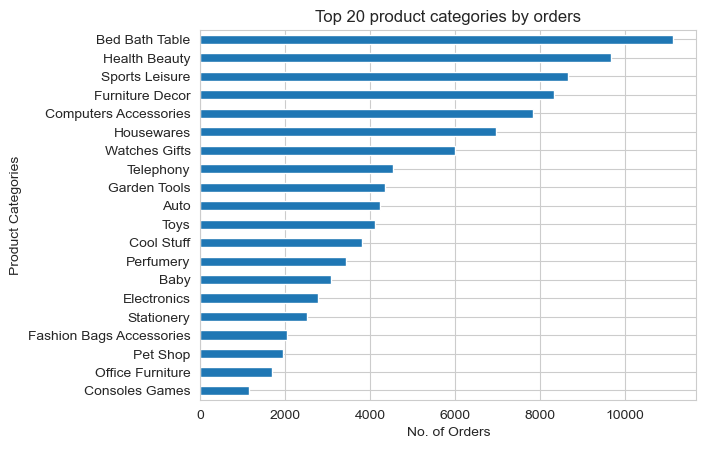

In [145]:
# we will now plot the bar graph based on number of orders
count_product_category = count_product_category.sort_values(ascending=True)
count_product_category[-20:].plot(kind='barh')
plt.title("Top 20 product categories by orders")
plt.xlabel("No. of Orders")
plt.ylabel("Product Categories")
plt.show()

**Bed Bath Table, Health Beauty and Sports Leisure tops the chart in terms of biggest product categories based on orders**

Which product category achieves the highest revenue?

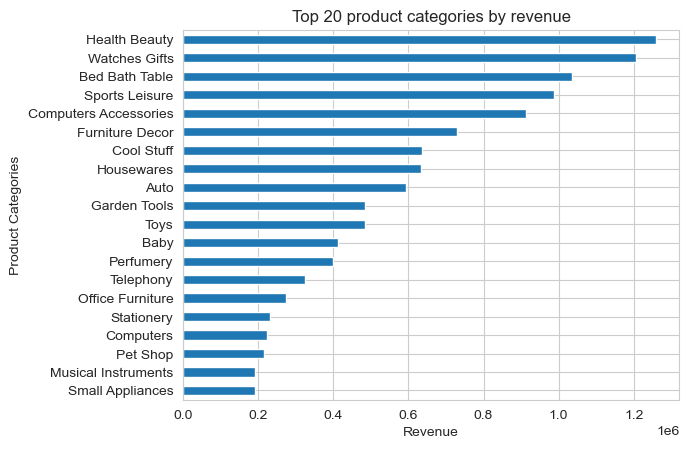

In [148]:
# we will now make adjustments in dataframe to plot revenue against top 20 product categories
rev_per_cat = products.groupby(['product_category_name_english'])['price'].sum()

# plot
rev_per_cat = rev_per_cat.sort_values(ascending=True)
rev_per_cat[-20:].plot(kind='barh')
plt.title("Top 20 product categories by revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Categories")
plt.show()

**Even though Health Beauty tops the chart, we can see that watches gift which did not make the top three before now comes at second with Bed Bath Table being pushed to 3rd.**

What is the overall performance by review?

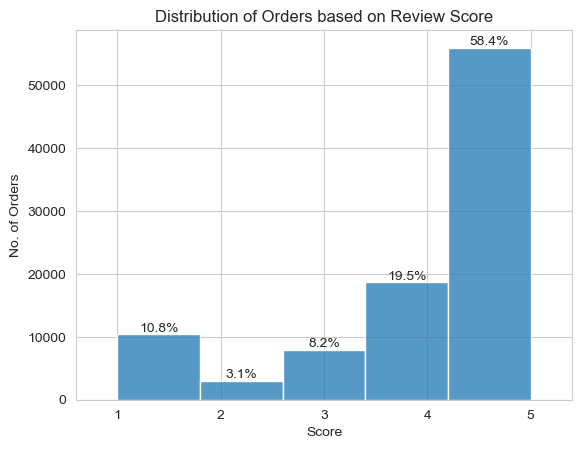

In [151]:
# Distribution of review score
# Merging data
orders = products.merge(datasets['orders'], on='order_id', how='left')
orders = orders.merge(datasets['order_reviews'], on='order_id', how='left')

# get orders that only got a review score
orders = orders[~orders.review_score.isnull()]

# get orders that only have items that belong to one category
category_count_per_order = orders.groupby(['order_id']).product_category_name_english.nunique()
order_id_with_unique_cat = category_count_per_order[category_count_per_order == 1].index

# filter orders to have only orders with items for same category
orders = orders.query('order_id in @order_id_with_unique_cat')

# drop orders that appears more than once because it has items for the same category and we don't want to bias the results.
orders = orders.drop_duplicates(subset='order_id')
orders.review_score = orders.review_score.astype(int)

review_counts = orders['review_score'].value_counts()

ax = sns.histplot(orders, x='review_score', bins=5)

# To include percentage in the chart
for a in ax.containers:
    ax.bar_label(a, fmt=lambda x: f'{(x/review_counts.sum())*100:0.1f}%')

ax.margins(x=0.1)

ax.set_xlabel("Score")
ax.set_ylabel("No. of Orders")
ax.set_title("Distribution of Orders based on Review Score")

plt.show()

**58.4% of reviews are 5 stars in orders.**

Which states have the largest customer bases?

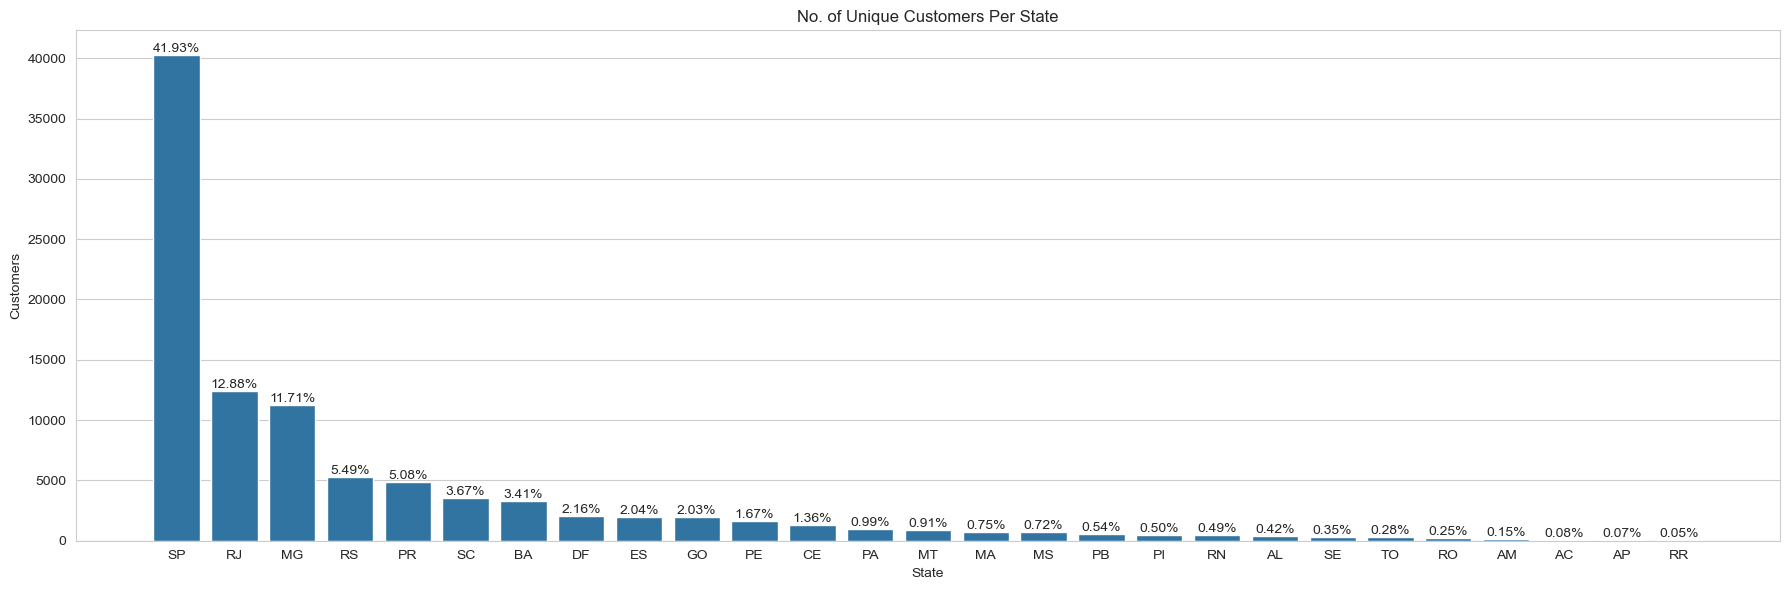

In [154]:
# As there could be same customer data recorded we do not want to have repeated values
unique_customers = datasets['customers'].drop_duplicates(subset='customer_unique_id', ignore_index=True)

# customer per state
customer_counts = unique_customers['customer_state'].value_counts().reset_index()
customer_counts.columns = ['state', 'num_customers']
customer_counts.head()

# Plot
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='state', y='num_customers', data=customer_counts)
for a in ax.containers:
    ax.bar_label(a, fmt=lambda x: f'{(x/customer_counts['num_customers'].sum())*100:0.2f}%')

ax.margins(x=0.05)

ax.set_xlabel("State")
ax.set_ylabel("Customers")
ax.set_title("No. of Unique Customers Per State")

plt.tight_layout()
plt.show()

**Sao Paulo has the highest percentage of clients by 41.93%.**